# Data Wrangling and we Rate Dogs

## Gathering Data

1. Twitter archive file : Download this file manually
2. Tweet Image Prediction
3. Twitter API and JSON

1. Twitter archive file

In [42]:
import tweepy
import requests
import pandas as pd
import json
import time
import math
import re
import numpy as np

In [2]:
# Import the Twitter archive CSV file into a DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Tweet image prediction

In [5]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Import the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image_predictions.tsv', sep='\t')

3. Twitter API and JSON

In [6]:

# Declare Twitter API keys and access tokens
consumer_key = 'OAkkxas8fYZEus3IKx5hsvmXR'
consumer_secret = '3eafmi0DiphaTexsSTnWMdoxdFS7oOSKRdTgkJgvCaBbV5GS05'
access_token = '2590040294-Sc3KTa0ftkcdPvA6MUGDBOEU92gLso4BptTioRO'
access_secret = '00CKTdOKv00I9RUo04CaqMbqil9mDtbwY9jNOA5BfnQ7A'

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [8]:

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
# Use Twitter API to collect status data on tweets present in twitter1 dataframe
tweet_ids = list(twitter_archive['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

Rate limit reached. Sleeping for: 246
888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
770743923962707968
Rate limit reached. Sleeping for: 731
756303284449767430
754120377874386944
754011816964026368


In [ ]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [27]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

# #Access

In [9]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1523,690607260360429569,6.903413e+17,467036706.0,2016-01-22 18:49:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 @LightningHoltt,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1936,673956914389192708,NaN,NaN,2015-12-07 20:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one esteemed pupper. Just graduated co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673956914...,10,10,one,None,None,pupper,None
2319,666447344410484738,NaN,NaN,2015-11-17 02:46:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,None,None,None,None
1773,678255464182861824,NaN,NaN,2015-12-19 16:47:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,None,None,None,None
332,832769181346996225,NaN,NaN,2017-02-18 01:50:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @EmilieGambril: 12/10 h*cking excited about...,8.327664e+17,487197737.0,2017-02-18 01:39:12 +0000,https://twitter.com/EmilieGambril/status/83276...,12,10,None,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# Check if there are any records in arc_df which are retweets
len(twitter_archive[twitter_archive.retweeted_status_id.isnull() == False])

181

In [12]:
# Check if there are any records in arc_df whose corresponding record with same tweet_id is missing in img_df table
len(twitter_archive[~twitter_archive.tweet_id.isin(img_df.tweet_id)])


281

In [13]:
# Sort by rating_denominator values
twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [14]:
# Sort by rating_numerator values
twitter_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [15]:
twitter_archive.name.value_counts().sort_index(ascending=False)

very             5
unacceptable     1
this             1
the              8
such             1
space            1
quite            4
one              4
old              1
officially       1
not              2
my               1
mad              2
light            1
life             1
just             4
infuriating      1
incredibly       1
his              1
getting          2
by               1
an               7
all              1
actually         2
a               55
Zuzu             1
Zooey            1
Zoey             3
Zoe              1
Ziva             1
                ..
Apollo           1
Antony           1
Anthony          1
Anna             1
Angel            1
Andy             1
Andru            1
Anakin           2
Amélie           1
Amy              1
Ambrose          1
Amber            1
Alice            2
Alfy             1
Alfie            5
Alf              1
Alexanderson     1
Alexander        1
Alejandro        1
Aldrick          1
Albus            2
Albert      

In [18]:
# Number of records whose both doggo and floofer columns are not None
len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.floofer != 'None')])

1

In [19]:

# Number of records whose both doggo and pupper columns are not None
len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.pupper != 'None')])

12

In [20]:
# Number of records whose both doggo and pupper columns are not None
len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.puppo != 'None')])

1

In [21]:
# Number of records whose both floofer and pupper columns are not None
len(twitter_archive[(twitter_archive.floofer != 'None') & (twitter_archive.pupper != 'None')])

0

In [22]:
# Number of records whose both floofer and puppo columns are not None
len(twitter_archive[(twitter_archive.floofer != 'None') & (twitter_archive.puppo != 'None')])

0

In [23]:
# Number of records whose both pupper and puppo columns are not None
len(twitter_archive[(twitter_archive.pupper != 'None') & (twitter_archive.puppo != 'None')])

0

In [24]:
img_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
651,682003177596559360,https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg,1,triceratops,0.249872,False,chimpanzee,0.060929,False,mask,0.050221,False
264,670797304698376195,https://pbs.twimg.com/media/CU8mlhoVAAAteS5.jpg,1,Pembroke,0.472197,True,beagle,0.090938,True,German_shepherd,0.064366,True
1623,803638050916102144,https://pbs.twimg.com/ext_tw_video_thumb/80363...,1,Labrador_retriever,0.372776,True,golden_retriever,0.343666,True,Great_Pyrenees,0.067242,True
1801,831939777352105988,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,1,Pomeranian,0.153862,True,marmot,0.091234,False,grey_fox,0.090644,False
1709,818145370475810820,https://pbs.twimg.com/media/C1qi26rW8AMaj9K.jpg,1,golden_retriever,0.621931,True,Labrador_retriever,0.364997,True,redbone,0.003971,True


In [25]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
status_df.sample(5)

,tweet_id,retweet_count,favorite_count,display_text_range
964,749064354620928000,1563,4925,"[0, 113]"
2055,670832455012716544,213,725,"[0, 86]"
1000,746542875601690625,1923,5169,"[0, 133]"
662,788908386943430656,13078,28638,"[0, 102]"
464,815736392542261248,2376,10243,"[0, 94]"


In [29]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
tweet_id              2333 non-null int64
retweet_count         2333 non-null int64
favorite_count        2333 non-null int64
display_text_range    2333 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


# Quality

# Cleaning data

In [33]:
# Take a copy of arc_df on which the cleaning tasks will be performed
archive_clean = twitter_archive.copy()

# Quality

twitter_archive: contains retweets and therefore, duplicates

# Define

Keep only those rows in twitter Archieve table that are original tweets and NOT retweets (i.e. retweeted_status_id column is null). Delete the rest.

# Code

In [34]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

# Test

In [35]:
len(archive_clean[archive_clean.retweeted_status_id.isnull() == False])

0

Define

Keep only those records in twitter_archive table whose tweet_id exists in img_df table

Code

In [36]:
archive_clean = archive_clean[archive_clean.tweet_id.isin(img_df.tweet_id)]

Test

In [37]:
len(archive_clean[~archive_clean.tweet_id.isin(img_df.tweet_id)])

0

# Tidiness

twitter_archive table without any duplicates (i.e. retweets) have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, which can be dropped

In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

Define

Drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns from twitter_archive table

Code

In [39]:
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ KB


# Quality

twitter_archive: erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id and timestamp columns)

# Define

Convert in_reply_to_status_id and in_reply_to_user_id to data type integer. Convert timestamp to datetime data type

# code

In [43]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.fillna(0)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.fillna(0)

archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(np.int64)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(np.int64)

archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 233.7+ KB


# Define

Strip all html anchor tags (i.e. <a..></a>) in source column and retain just the text in between the tags. Convert the datatype from string to categorical.

# Code

In [45]:
archive_clean.source = archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [46]:
archive_clean.source = archive_clean.source.astype('category')

In [47]:
archive_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

twitter_archive: text column contains untruncated text instead of displayable text

## Define

Using the display_text_range of status_df table, extract displayable text from text column

## Code

In [53]:
# Before extraction: untruncated text of first 3 records
print(archive_clean.iloc[0].text)
print(archive_clean.iloc[1].text)
print(archive_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


In [54]:
# merge status_df's display_text_range column to archive_clean to extract text using range values
archive_clean = pd.merge(archive_clean, status_df[['tweet_id', 'display_text_range']], on='tweet_id')

In [55]:
# using display_text_range of archive_clean, extract displayable text
for i, row in archive_clean.iterrows():
    text_range = row.display_text_range
    display_text = row.text[text_range[0]:text_range[1]]
    archive_clean.set_value(i, 'text', display_text)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [56]:
# drop display_text_range column
archive_clean.drop('display_text_range', axis=1, inplace=True)

## Test

In [57]:
# After extraction: first 3 records now show displayable text
print(archive_clean.iloc[0].text)
print(archive_clean.iloc[1].text)
print(archive_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


arc_df: rating_denominator column has values other than 10

In [58]:
# regex to match fractions
pattern = "\s*(\d+([.]\d+)?([/]\d+))"

# function which will match the above pattern and return an array of fractions, if any
def tokens(x):
  return [m.group(1) for m in re.finditer(pattern, x)]

In [65]:
# iterate through all those records whose rating_denominator is not 10
for i, row in archive_clean[archive_clean.rating_denominator != 10].iterrows():
    d = row.rating_denominator
    
    # if rating_denominator is greater than 10 and divisible by 10
    if d > 10 and d%10 == 0:
        # assign divisor as the quotient
        divisor = d/10
        n = row.rating_numerator
        
        # if rating_numerator is greater than 10 and divisible by the divisor
        if n%divisor == 0:
            # reassign rating_denominator as 10
            archive_clean.set_value(i, 'rating_denominator', 10)
            # reassign rating_numerator as the quotient of rating_numerator by divisor
            archive_clean.set_value(i, 'rating_numerator', int(n/divisor))
    
    # for all those records whose rating_denominator is either less than 10 or not divisible by 10
    else:
        # extract all fractions(ratings) from text using tokens function
        ratings = tokens(row.text)
        # iterate through all the fractions
        for rating in ratings:
            # if denominator of any such fraction is equal to 10
            if rating.split('/')[1] == '10':
                # reassign rating_denominator as 10
                archive_clean.set_value(i, 'rating_denominator', 10)
                # reassign rating_numerator as the numerator value of this fraction
                archive_clean.set_value(i, 'rating_numerator', int(round(float(rating.split('/')[0]))))
                break

In [66]:
archive_clean.rating_denominator.value_counts()

10    1986
7        1
Name: rating_denominator, dtype: int64

In [67]:
archive_clean[(archive_clean.rating_numerator <= 10) | (archive_clean.rating_numerator > 14)].rating_numerator.value_counts().sort_index()

0         2
1         4
2         9
3        19
4        14
5        31
6        32
7        51
8        94
9       152
10      420
24        1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [70]:
# for rows whose rating numerator is either less than or equal to 10 OR
# greater than 10 but has a very high value (consider greater than 14)
for i, row in archive_clean[(archive_clean.rating_numerator <= 10) | (archive_clean.rating_numerator > 14)].iterrows():
    ratings = tokens(row.text)
    for rating in ratings:        
        if rating.split('/')[1] == '10':
            n = int(round(float(rating.split('/')[0])))
            if (row.rating_numerator == 10 and n > 10) or (row.rating_numerator != 10 and n >= 10):
                archive_clean.set_value(i, 'rating_numerator', n)
                break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [71]:
archive_clean[(archive_clean.rating_numerator <= 10) | (archive_clean.rating_numerator > 14)].rating_numerator.value_counts().sort_index()

0         2
1         4
2         9
3        19
4        14
5        31
6        32
7        51
8        94
9       152
10      420
24        1
420       1
1776      1
Name: rating_numerator, dtype: int64

twitter_archive: erroneous dog names starting with lowercase characters (e.g. a, an, actually, by)

In [72]:
archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
archive_clean.name[archive_clean.name == 'None'].value_counts()

None    644
Name: name, dtype: int64

In [74]:
# Sort ascending by name to check if there are more names starting with a lowercase alphabet
archive_clean.name.value_counts().sort_index(ascending=False)

Zuzu            1
Zooey           1
Zoey            3
Zoe             1
Ziva            1
Zeus            1
Zeke            3
Zeek            1
Zara            1
Yogi            2
Yoda            1
Wyatt           3
Wishes          1
Winston         8
Winnie          4
Winifred        1
Wilson          3
Willy           1
Willow          1
Willie          1
William         1
Willem          1
Wiggles         1
Wesley          1
Watson          2
Walter          3
Wally           2
Wallace         3
Walker          1
Waffles         3
               ..
Apollo          1
Antony          1
Anthony         1
Anna            1
Angel           1
Andy            1
Andru           1
Anakin          1
Amélie          1
Amy             1
Ambrose         1
Amber           1
Alice           2
Alfy            1
Alfie           4
Alf             1
Alexanderson    1
Alexander       1
Alejandro       1
Aldrick         1
Albus           2
Albert          2
Al              1
Akumi           1
Aja       

twitter_archive: some records have more than one dog stage¶

In [75]:
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.puppo != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')]))

1
1
9


Define: 
There is one record that has both doggo and floofer and another record that has both doggo and puppo. For these 2 records, take a look at the text manually to decide one dog stage for each of them. For ambiguous texts, set both the column values as None.

There are 9 records which have both doggo and pupper. As per the dogtionary, doggo and pupper are sometimes used interchangeably. Therefore, set pupper column as None for these 9 records.

In [76]:
for i, row in archive_clean[((archive_clean.doggo != 'None') & (archive_clean.floofer != 'None'))
                   | ((archive_clean.doggo != 'None') & (archive_clean.puppo != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs



In [77]:
# based on the above texts, doggo should be set as None for both the records
archive_clean['doggo'][archive_clean.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
# set pupper column as None for records which have both doggo and pupper
archive_clean['pupper'][(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
len(archive_clean[((archive_clean.doggo != 'None') & (archive_clean.pupper != 'None'))
                  | ((archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')) 
                  | ((archive_clean.doggo != 'None') & (archive_clean.puppo != 'None'))])

0

# Tidiness

In [80]:
archive_clean.doggo.value_counts()

None     1916
doggo      71
Name: doggo, dtype: int64

In [81]:
archive_clean.floofer.value_counts()

None       1979
floofer       8
Name: floofer, dtype: int64

In [82]:
archive_clean.pupper.value_counts()

None      1784
pupper     203
Name: pupper, dtype: int64

In [83]:
archive_clean.puppo.value_counts()

None     1964
puppo      23
Name: puppo, dtype: int64

Define : Merge the doggo, floofer, pupper and puppo columns to a stage column. Convert the datatype from string to categorical as it helps with analysis and visualization and saves memory on disk.

Drop the doggo, floofer, pupper and puppo columns.

In [84]:
# merge the doggo, floofer, pupper and puppo columns to a stage column
archive_clean['stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [85]:
# convert the datatype from string to categorical
archive_clean.stage = archive_clean.stage.astype('category')

In [86]:
# drop the doggo, floofer, pupper and puppo columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [87]:
archive_clean.stage.value_counts()

None       1682
pupper      203
doggo        71
puppo        23
floofer       8
Name: stage, dtype: int64

In [88]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 13 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    1987 non-null int64
in_reply_to_user_id      1987 non-null int64
timestamp                1987 non-null datetime64[ns]
source                   1987 non-null category
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
display_text_range_x     1987 non-null object
display_text_range_y     1987 non-null object
stage                    1987 non-null category
dtypes: category(2), datetime64[ns](1), int64(5), object(5)
memory usage: 270.5+ KB


Define:
Create breed, retweet_count and favorite_count columns in arc_df table. For each tweet_id, use the img_df table to check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True. If it is, set the value of p1 column in breed column.

Also, fetch the retweet_count and favorite_count columns of status_df table and assign those values to arc_df table

In [89]:
# create breed, retweet_count and favorite_count columns
archive_clean['breed'] = 'None'
archive_clean['retweet_count'] = 0
archive_clean['favorite_count'] = 0

In [90]:
# iterate through all the rows of archive_clean
for i, row in archive_clean.iterrows():
    # fetch the retweet_count and favorite_count columns of status_df table and assign those values
    archive_clean.set_value(i, 'retweet_count', status_df[status_df.tweet_id == row.tweet_id].retweet_count.iloc[0])
    archive_clean.set_value(i, 'favorite_count', status_df[status_df.tweet_id == row.tweet_id].favorite_count.iloc[0])    
    
    img_prediction = img_df[img_df.tweet_id == row.tweet_id]
    p1_conf = img_prediction.p1_conf.iloc[0]
    p1_dog = img_prediction.p1_dog.iloc[0]
    #  check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True
    if p1_conf >= 0.95 and p1_dog:
        archive_clean.set_value(i, 'breed', img_prediction.p1.iloc[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [91]:
archive_clean.breed.value_counts()

None                           1804
pug                              20
Pembroke                         19
Samoyed                          18
golden_retriever                 16
Pomeranian                       13
Chihuahua                         9
French_bulldog                    8
Labrador_retriever                7
chow                              7
Bernese_mountain_dog              4
German_shepherd                   4
Shetland_sheepdog                 4
Old_English_sheepdog              3
beagle                            3
Blenheim_spaniel                  3
Pekinese                          3
keeshond                          2
komondor                          2
Saint_Bernard                     2
bull_mastiff                      2
malamute                          2
basset                            2
Rottweiler                        2
cocker_spaniel                    2
English_springer                  2
Boston_bull                       2
dalmatian                   

In [92]:
archive_clean[['tweet_id', 'retweet_count', 'favorite_count']].sample(5)

,tweet_id,retweet_count,favorite_count
1887,667793409583771648,323,689
693,752334515931054080,1141,3927
973,709901256215666688,102,683
929,715200624753819648,1920,5237
1654,672169685991993344,364,1006


## Stroring Data

In [93]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing Data

In [94]:
# For analysis, create a copy of the cleaned twitter archive data
df = archive_clean.copy()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 16 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    1987 non-null int64
in_reply_to_user_id      1987 non-null int64
timestamp                1987 non-null datetime64[ns]
source                   1987 non-null category
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
display_text_range_x     1987 non-null object
display_text_range_y     1987 non-null object
stage                    1987 non-null category
breed                    1987 non-null object
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
dtypes: category(2), datetime64[ns](1), int64(7), object(6)
memory usage: 237.0+ KB


Analyzing number of tweets posted by WeRateDogs' over time

In [96]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    366
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     81
2016-07     87
2016-08     59
2016-09     62
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     63
2017-03     46
2017-04     41
2017-05     43
2017-06     43
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

Most used Twitter Source

In [97]:
df['source'].value_counts()

Twitter for iPhone    1949
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

Analysis of rating of dogs

In [98]:
df['rating_numerator'].value_counts().sort_index()

0         2
1         4
2         9
3        19
4        14
5        31
6        32
7        51
8        94
9       152
10      420
11      407
12      453
13      259
14       37
24        1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [99]:
df['rating_numerator'][df['rating_numerator'] > 10].value_counts().sum()

1159

Analysis of dog breed (as identified by image prediction)

In [100]:
df['breed'][df['breed'] == 'None'].value_counts()

None    1804
Name: breed, dtype: int64

Analysis of retweet and favorite counts

In [101]:
print('%s\t%s' % ('Mean Retweet Count', round(df.retweet_count.mean())))
print('%s\t%s' % ('Mean Favorite Count', round(df.favorite_count.mean())))

Mean Retweet Count	2527.0
Mean Favorite Count	8473.0


In [102]:
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.rating_numerator > 10].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.rating_numerator > 10].mean())))

Mean Retweet Count	3521.0
Mean Favorite Count	12224.0


In [103]:
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.name != 'None'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.name != 'None'].mean())))

Mean Retweet Count	2483.0
Mean Favorite Count	8839.0


In [104]:
print('Doggo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'doggo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'doggo'].mean())))

print('Floofer')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'floofer'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'floofer'].mean())))

print('Pupper')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'pupper'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'pupper'].mean())))

print('Puppo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'puppo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'puppo'].mean())))

Doggo
Mean Retweet Count	6360.0
Mean Favorite Count	18521.0
Floofer
Mean Retweet Count	4314.0
Mean Favorite Count	12838.0
Pupper
Mean Retweet Count	2152.0
Mean Favorite Count	6833.0
Puppo
Mean Retweet Count	6502.0
Mean Favorite Count	22299.0


In [105]:
df.name.value_counts()

None          644
Cooper         10
Oliver         10
Charlie        10
Tucker          9
Lucy            9
Penny           9
Winston         8
Sadie           8
Daisy           7
Lola            7
Toby            7
Koda            6
Bella           6
Bo              6
Jax             6
Stanley         6
Scout           5
Rusty           5
Milo            5
Oscar           5
Louis           5
Chester         5
Leo             5
Buddy           5
Bailey          5
Dave            5
Jack            4
Gus             4
Brody           4
             ... 
Koko            1
Longfellow      1
Flash           1
Dex             1
Clifford        1
Tango           1
Jessifer        1
Strudel         1
Ken             1
Cal             1
Pumpkin         1
Timber          1
Antony          1
Genevieve       1
Rumble          1
Chompsky        1
Jackie          1
Vinnie          1
Superpup        1
Emma            1
Skye            1
Ruffles         1
Anthony         1
Carll           1
Jordy     

## Visualizing Data

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

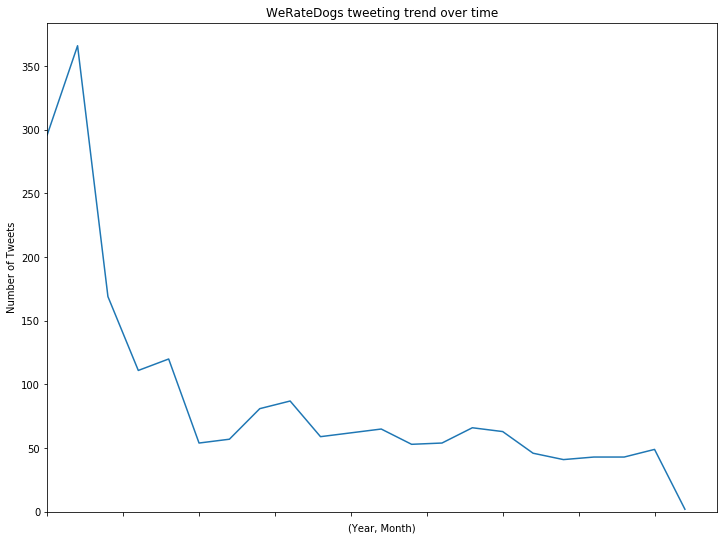

In [114]:
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
ax = data.plot('line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_xlim(0, )
ax.set_ylim(0, )
plt.savefig('tweet_trend')

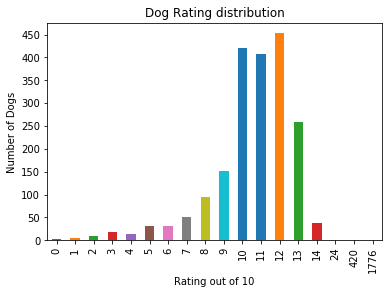

In [108]:
ax = df.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')

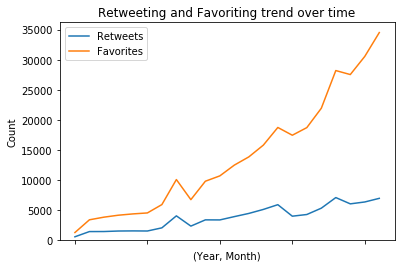

In [109]:
plt.subplots(1, sharex=True)
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line')
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

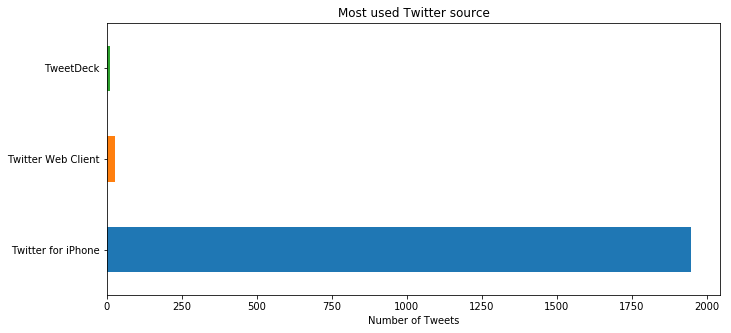

In [110]:
df['source'].value_counts().plot('barh', figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

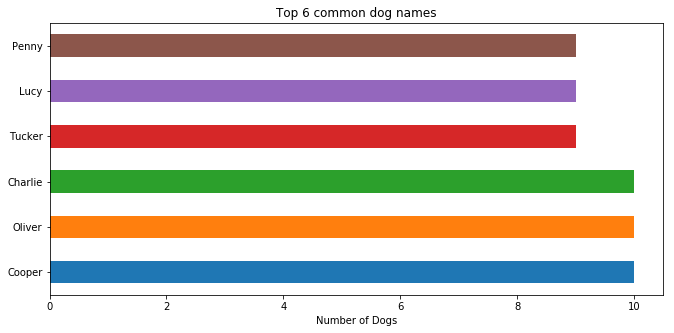

In [111]:
df.name.value_counts()[1:7].plot('barh', figsize=(11,5), title='Top 6 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')